# <span style="color:#336699; text-align:center">Introduction to the Python Client Library Harmonize (harmonizeds.py)</span>
<hr style="border:2px solid #0077b9;">

<br/>

# Python Client API
<hr style="border:1px solid #0077b9;">

For running the examples in this Jupyter Notebook you will need to install the [Client Python](https://github.com/brazil-data-cube/harmonizeds.py).To install it from pip, use the following command:

In [ ]:
!pip install git+https://github.com/Harmonize-Brazil/harmonize-ds

In order to access the funcionalities of the client API, you should import the `harmonize_ds` package, as follows:

In [2]:
from harmonize_ds import HARMONIZEDS

# Listing the Available Datasets
<hr style="border:1px solid #0077b9;">

In the Jupyter environment, the HARMONIZEDS object will list the available datasets from the service:

In [6]:
print("Available collections:")
for collection in HARMONIZEDS.collections():
    print(collection)

Available collections:
{'id': 'bdc_lcc-wfs', 'collection': 'bdc_lcc:anomaly_cdays_temp_max_ne_mun_epiweek'}
{'id': 'bdc_lcc-wfs', 'collection': 'bdc_lcc:anomaly_cdays_temp_max_ne_mun_month'}
{'id': 'bdc_lcc-wfs', 'collection': 'bdc_lcc:anomaly_cdays_temp_max_no_mun_epiweek'}
{'id': 'bdc_lcc-wfs', 'collection': 'bdc_lcc:anomaly_cdays_temp_max_no_mun_month'}
{'id': 'bdc_lcc-wfs', 'collection': 'bdc_lcc:chagas_disease_cases_northeast_mun_month'}
{'id': 'bdc_lcc-wfs', 'collection': 'bdc_lcc:chagas_disease_cases_northeast_mun_week'}
{'id': 'bdc_lcc-wfs', 'collection': 'bdc_lcc:chagas_disease_cases_northeast_mun_year'}
{'id': 'bdc_lcc-wfs', 'collection': 'bdc_lcc:chagas_disease_cases_north_mun_month'}
{'id': 'bdc_lcc-wfs', 'collection': 'bdc_lcc:chagas_disease_cases_north_mun_week'}
{'id': 'bdc_lcc-wfs', 'collection': 'bdc_lcc:chagas_disease_cases_north_mun_year'}
{'id': 'bdc_lcc-wfs', 'collection': 'bdc_lcc:chikungunya_alert_level_northeast_mun_week_infodengue'}
{'id': 'bdc_lcc-wfs', 'colle

# Retrieving the Metadata of a Dataset
<hr style="border:1px solid #0077b9;">

You can access the metadata of a specific dataset using the identifier of datasource (``id``) and collection ``collection_id``.

In [8]:
zica = HARMONIZEDS.get_collection(
    id="bdc_lcc-wfs", collection_id="bdc_lcc:zika_cases_north_mun_week"
)

In [9]:
metadata_zica = zica.describe()
metadata_zica

{'name': 'zika_cases_north_mun_week',
 'namespace': 'bdc_lcc',
 'full_name': 'bdc_lcc:zika_cases_north_mun_week',
 'attributes': [{'name': 'cod', 'localtype': 'string', 'type': 'xsd:string'},
  {'name': 'date', 'localtype': 'date-time', 'type': 'xsd:date-time'},
  {'name': 'name', 'localtype': 'string', 'type': 'xsd:string'},
  {'name': 'agg', 'localtype': 'string', 'type': 'xsd:string'},
  {'name': 'agg_time', 'localtype': 'string', 'type': 'xsd:string'},
  {'name': 'value', 'localtype': 'number', 'type': 'xsd:number'},
  {'name': 'geom', 'localtype': 'Polygon', 'type': 'gml:Polygon'}],
 'title': 'zika_cases_NO_mun_week',
 'abstract': '',
 'bbox': {'lower': '-51.01100158691406 -5.217824935913086',
  'upper': '-48.123191833496094 -0.9985391497612'},
 'ft_name': 'bdc_lcc:zika_cases_north_mun_week',
 'geometry': {'name': 'geom', 'localtype': 'Polygon', 'type': 'gml:Polygon'}}

# Retrieving the data
<hr style="border:1px solid #0077b9;">

In order to retrieve the data of a dataset, use the the function ``get()``. This will return the data in a ``GeoPandas``.

In [10]:
df = zica.get(
        filter={
            'date': '2017-02-26'
        }
)

/home/fabi/Documents/harmonize/dev/harmonize-ds/.venv/lib/python3.12/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[15:38:32] ⚠ Finishing...                                                                                ]8;id=221268;file:///home/fabi/Documents/harmonize/dev/harmonize-ds/harmonize_ds/sources/wfs.py\wfs.py]8;;\:]8;id=74678;file:///home/fabi/Documents/harmonize/dev/harmonize-ds/harmonize_ds/sources/wfs.py#246\246]8;;\

           ✅ Total features received: 21                                                                ]8;id=19517;file:///home/fabi/Documents/harmonize/dev/harmonize-ds/harmonize_ds/sources/wfs.py\wfs.py]8;;\:]8;id=621107;file:///home/fabi/Documents/harmonize/dev/harmonize-ds/harmonize_ds/sources/wfs.py#299\299]8;;\

In [ ]:
# This function returns the first n rows of data
df.head()

,geom,cod,date,name,agg,agg_time,value
0,"POLYGON ((-48.91969 -1.94722, -48.91996 -1.946...",150010,2017-02-26T00:00:00Z,indi_0016,mun_res,week,0.0
1,"POLYGON ((-48.39812 -1.39276, -48.39812 -1.393...",150080,2017-02-26T00:00:00Z,indi_0016,mun_res,week,0.0
2,"POLYGON ((-49.94238 -2.75754, -49.94238 -2.757...",150110,2017-02-26T00:00:00Z,indi_0016,mun_res,week,0.0
3,"POLYGON ((-49.55923 -2.9383, -49.56253 -2.9394...",150120,2017-02-26T00:00:00Z,indi_0016,mun_res,week,0.0
4,"POLYGON ((-48.66029 -1.69231, -48.66324 -1.690...",150130,2017-02-26T00:00:00Z,indi_0016,mun_res,week,0.0


# Retrieving the data with filter
<hr style="border:1px solid #0077b9;">

In [23]:
from shapely.geometry import box

In [21]:
df2 = zica.get(filter={
   "date": "2017-02-01/2017-02-30",
   'bbox': [-49.15454736, -1.95658217, -48.55769686, -1.69057331]
   })


/home/fabi/Documents/harmonize/dev/harmonize-ds/.venv/lib/python3.12/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

[15:40:11] ⚠ Finishing...                                                                                ]8;id=626325;file:///home/fabi/Documents/harmonize/dev/harmonize-ds/harmonize_ds/sources/wfs.py\wfs.py]8;;\:]8;id=437519;file:///home/fabi/Documents/harmonize/dev/harmonize-ds/harmonize_ds/sources/wfs.py#246\246]8;;\

           ✅ Total features received: 16                                                                ]8;id=265606;file:///home/fabi/Documents/harmonize/dev/harmonize-ds/harmonize_ds/sources/wfs.py\wfs.py]8;;\:]8;id=104595;file:///home/fabi/Documents/harmonize/dev/harmonize-ds/harmonize_ds/sources/wfs.py#299\299]8;;\

/home/fabi/Documents/harmonize/dev/harmonize-ds/.venv/lib/python3.12/site-packages/rich/live.py:231: UserWarning: 
install "ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

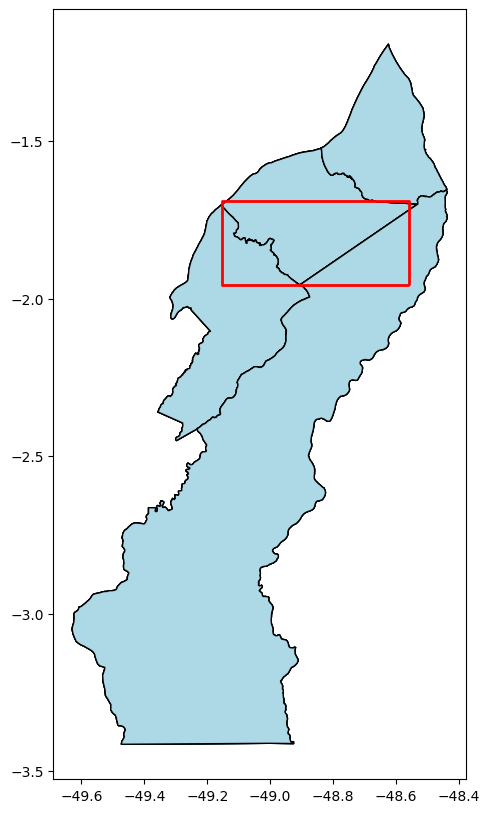

In [25]:
bbox_geom = box(*[-49.15454736, -1.95658217, -48.55769686, -1.69057331])
bbox_gs = gpd.GeoSeries([bbox_geom], crs=4326)

ax = df2.plot(figsize=(10, 10), color='lightblue', edgecolor='k')


bbox_gs.boundary.plot(ax=ax, edgecolor='red', linewidth=2)

plt.show()

# Visualizing the data
<hr style="border:1px solid #0077b9;">

It is possible to plot the dataset data with the ``plot`` method:

In [12]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


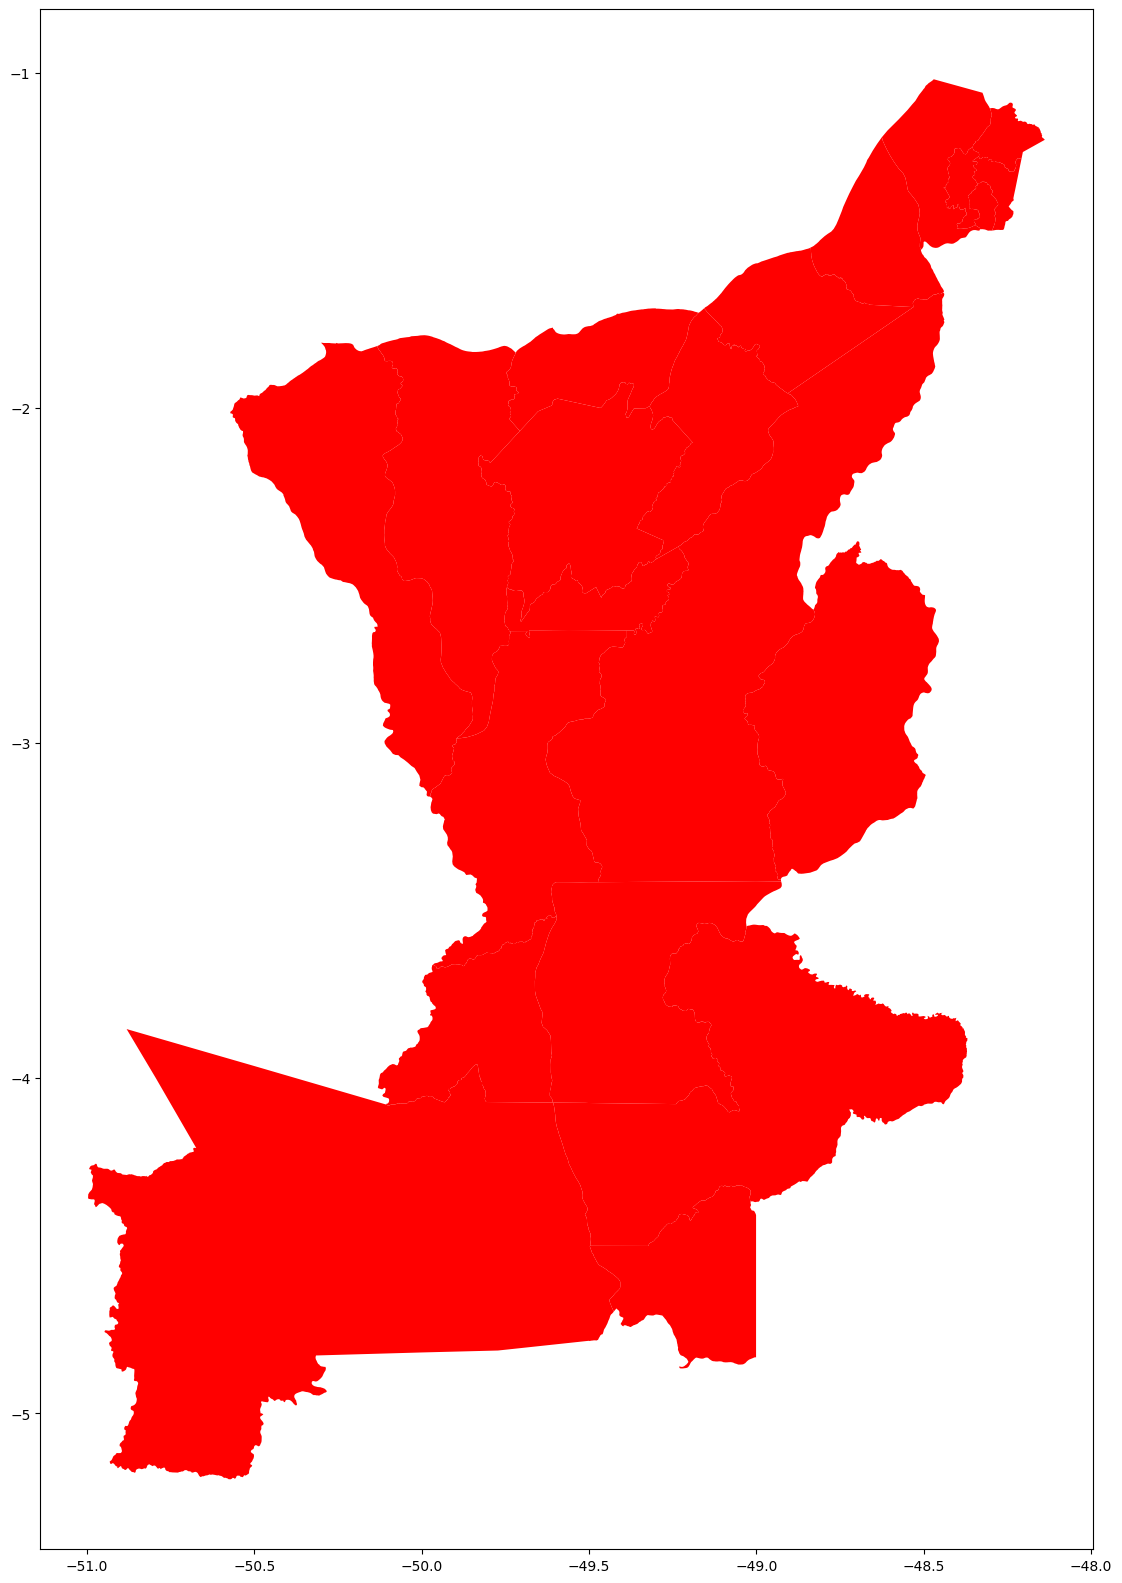

In [13]:
df.plot( marker='o', color='red', markersize=5, figsize=(20, 20));

# Visualizing the data with GeoPandas and others data
<hr style="border:1px solid #0077b9;">

After retrieving dataset data you can use any Python library to perform data processing. In this section we show how to use ``GeoPandas`` to load and use others data. With Pandas installed, import the library:

In [14]:
import geopandas as gpd
from matplotlib import pyplot as plt

You can define a file to import. In this example we use the ``read_file()`` to open a shapefile. Those data can be found in [unidades_da_federacao](http://servicodados.ibge.gov.br/Download/Download.ashx?u=geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2017/Brasil/BR/br_unidades_da_federacao.zip) and [Biomas_250mil](ftp://geoftp.ibge.gov.br/informacoes_ambientais/estudos_ambientais/biomas/vetores/Biomas_250mil.zip)

In [15]:
file_biomas = "https://geoftp.ibge.gov.br/informacoes_ambientais/estudos_ambientais/biomas/vetores/Biomas_250mil.zip"
file_uf = "https://geoftp.ibge.gov.br/organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2020/Brasil/BR/BR_UF_2020.zip"

In [16]:
# Load the biomas data of IBGE
biomas = gpd.read_file(file_biomas)

In [17]:
biomas

,Bioma,CD_Bioma,geometry
0,Amazônia,1,"MULTIPOLYGON (((-44.08515 -2.41669, -44.0856 -..."
1,Caatinga,2,"POLYGON ((-41.7408 -2.80826, -41.73673 -2.8093..."
2,Cerrado,3,"POLYGON ((-43.39009 -2.33937, -43.38741 -2.342..."
3,Mata Atlântica,4,"MULTIPOLYGON (((-48.70814 -28.44851, -48.70994..."
4,Pampa,5,"POLYGON ((-52.82472 -27.46295, -52.81558 -27.4..."
5,Pantanal,6,"POLYGON ((-57.75946 -15.72779, -57.75659 -15.7..."


In [18]:
uf = gpd.read_file(file_uf)

In [19]:
uf.head()

,CD_UF,NM_UF,SIGLA_UF,NM_REGIAO,geometry
0,11,Rondônia,RO,Norte,"POLYGON ((-65.3815 -10.42907, -65.38013 -10.42..."
1,12,Acre,AC,Norte,"POLYGON ((-71.07772 -9.82774, -71.07817 -9.828..."
2,13,Amazonas,AM,Norte,"POLYGON ((-69.83766 -3.68659, -69.82555 -3.620..."
3,14,Roraima,RR,Norte,"POLYGON ((-63.96008 2.47313, -63.96041 2.47416..."
4,15,Pará,PA,Norte,"MULTIPOLYGON (((-51.43248 -0.47334, -51.42949 ..."


The code below plots ``biomes``, ``federative units`` and ``zica`` ``df`` samples on a single map:

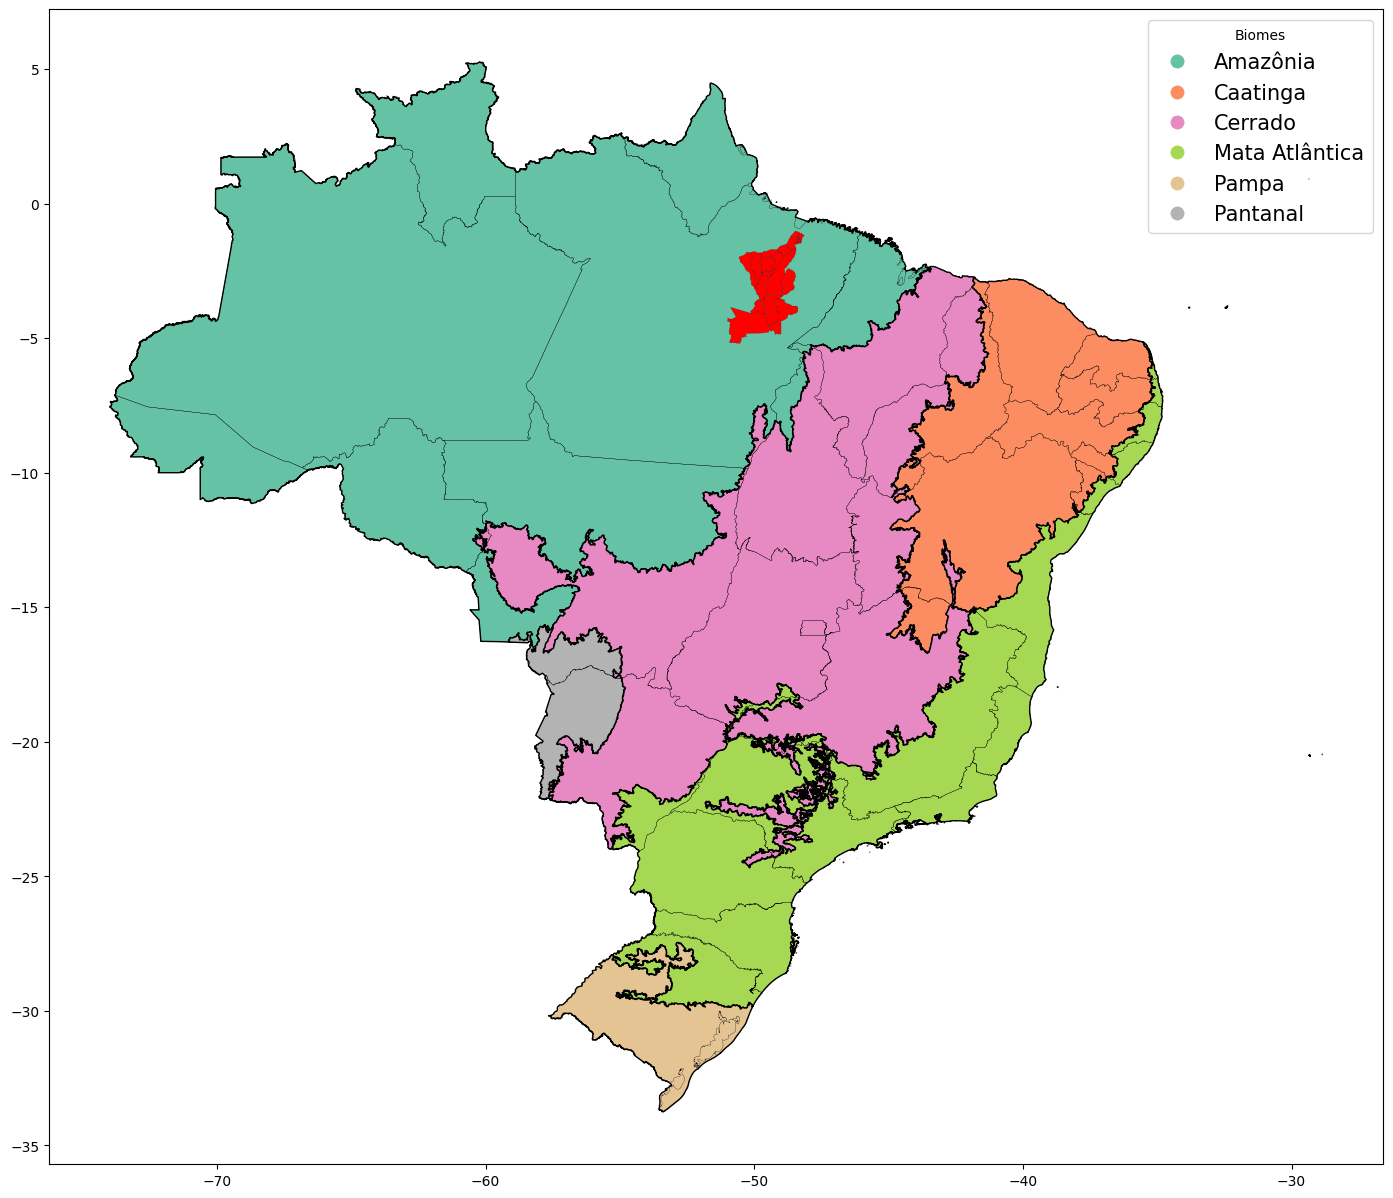

In [20]:
fig, ax = plt.subplots(figsize=(20,15))

biomas.plot(ax=ax, cmap='Set2', column='Bioma',edgecolor='black', legend=True,legend_kwds={'title': "Biomes", 'fontsize': 15})

uf.geometry.boundary.plot(ax=ax, color=None, edgecolor='black',linewidth = 0.2)

df.plot(ax=ax, color='red', markersize=4, edgecolor='black', linewidth = 0.1);

# Save data to file
<hr style="border:1px solid #0077b9;">

You can save data from a dataset to a ``shapefile`` using the ``.save_feature`` method. It is necessary to inform in the parameter path, the directory that you want to save the file and the data. In the example below the data ``df`` from the ``zica`` dataset is being saved in a shapefile with the name ``my_save_bdc_obs``

In [ ]:
HARMONIZEDS.save_feature(filename="my_save_bdc_obs.shp", gdf=df)